In [160]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math


ادرس دهی فایل های هیستوی با فرمت csv

In [178]:
file_list = ['C:/Users/delta2794900/Downloads/history one/1433772.csv']

خواندن فایل ها و مرتب و تمیز کاری فایل ها و تبدیل بازدهی و ضرر ها و کمیستون و سواپ به درصد 

In [180]:
cancelled_order=[]
cancel_order=cancelled_order
with open('C:/Users/delta2794900/Documents/analyses.one/test2.csv', 'w', newline='') as f_out:
    writer = csv.writer(f_out)

    b= 0 
    for file_name in file_list:
        b =b+1
        c = 0
        balance = 0
        
        bag = 0
        with open(file_name) as f_in:
            reader = list(csv.reader(f_in, delimiter=';'))
            readera = reversed(reader)
            for i in readera:
                bag = bag + 1
                #print(b,bag,i)

                if c == 0 :
                    balance = i[-1].replace(' ','')
                    c = c +1
                    continue

                if i[1] == 'Balance':
                    bal = i[-1].replace(' ','')
                    bal = float(bal)
                    balance =float(balance) 
                    balance = bal + balance
                    continue
                                      
                    
                if i[1] == 'Type':
                    continue                    
                
                
                if i[-1] == 'cancelled':
                    cancelled_order.append(i)
                    continue


                balance  = float(balance)
                #print(b,balance)

                if len(i) == 11:
                    i.insert(5, 'notsl')
                    i.insert(6, 'nottp')
                    i.append('notcomment ')
                    
                if len(i) == 13:
                    i.insert(7,'0')
                    


                if i[-2] == '[sl]':
                    prof  = str(i[-3])
                    swap  = str(i[-4])
                    com   = str(i[-5])
                    prof  = i[-3].replace(' ','')
                    swap  = i[-4].replace(' ','')
                    com   = i[-5].replace(' ','')
                    prof  = float(prof)
                    if swap == '' :
                        swap = 0
                    swap  = float(swap)
                    if com == '' :
                        com = 0
                    com   = float(com)
                    prof  = prof * 100 / balance                    
                    swap  = swap * 100 / balance
                    com   = com * 100 / balance
                    i[-3] = prof
                    i[-4] = swap
                    i[-5] = com
                    writer.writerow(i)
                    continue
                    
                if i[-2] == '[tp]':
                    prof  = str(i[-3])
                    swap  = str(i[-4])
                    com   = str(i[-5])                    
                    prof  = i[-3].replace(' ','')
                    swap  = i[-4].replace(' ','')
                    com   = i[-5].replace(' ','')
                    prof  = float(prof)
                    if swap == '' :
                        swap = 0
                    swap  = float(swap)
                    if com == '' :
                        com = 0                    
                    com   = float(com)
                    prof  = prof * 100 / balance
                    swap  = swap * 100 / balance
                    com   = com * 100 / balance
                    i[-3] = prof
                    i[-4] = swap
                    i[-5] = com
                    writer.writerow(i)
                    continue
                    
                if i[-2] != 'cancelled' :
                    prof  = str(i[-2])
                    swap  = str(i[-3])
                    com   = str(i[-4])                    
                    prof  = i[-2].replace(' ','')
                    swap  = i[-3].replace(' ','')
                    com   = i[-4].replace(' ','')
                    prof  = float(prof)
                    if swap == '' :
                        swap = 0
                    swap  = float(swap)
                    if com == '' :
                        com = 0                    
                    com   = float(com)
                    prof  = prof * 100 / balance
                    swap  = swap * 100 / balance
                    com   = com * 100 / balance
                    i[-2] = prof
                    i[-3] = swap
                    i[-4] = com
                    writer.writerow(i)
                    continue
                


نام گذاری ستون ها و خواندن فایل با ماژول pandas

In [181]:


colname = ['Time','Type','Volume','Symbol','Price','S/L','T/P','Volume1','Time1','Price1','Commission','Swap','Profit','Comment']
df = pd.read_csv('C:/Users/delta2794900/Documents/analyses.one/test2.csv', names = colname)



تراکنش سطر ها را به ترتیب تاریخ چیدن 

In [182]:

df['Time'] = pd.to_datetime(df['Time'], format='%Y.%m.%d %H:%M:%S')
df = df.sort_values(by='Time')
df.to_csv("sorted,test2.csv", index=False, header=None)

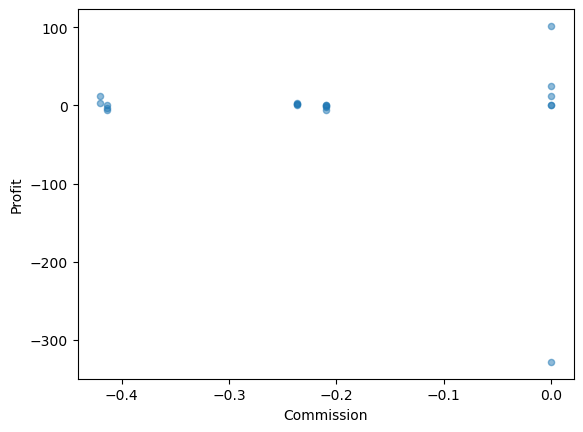

سود و ضرر ها به صورت لگاریتمی محاسبه شده (مقدار جمع سود ها به صورت سود مرکب حساب شده و ضرر ها نیز به صورت درصدی از کل سود کم میشوند) 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


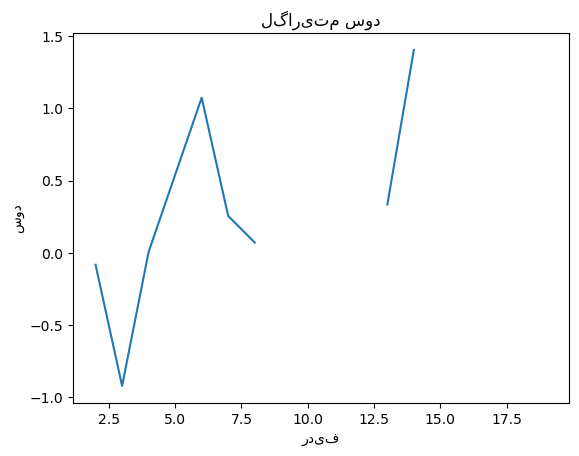

In [157]:
# خواندن داده ها از فایل csv
data = pd.read_csv('C:/Users/delta2794900/sorted,test2.csv')

# محاسبه سود مرکب
profit = 0
for p in data.iloc[:, -2]:
    if p > 0:
        profit += p
    elif p < 0:
        profit += p

# تبدیل سود مرکب به درصد
profit_percent = (profit / data.iloc[0, -2]) * 100

# ایجاد چارت لگاریتمی
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, len(data)+1)
y = np.log10(data.iloc[:, -2])
plt.plot(x, y)

plt.title('لگاریتم سود')
plt.xlabel('ردیف')
plt.ylabel('سود')

plt.show()
im mahdi im mahndi movnmkj fd opvjopjnm

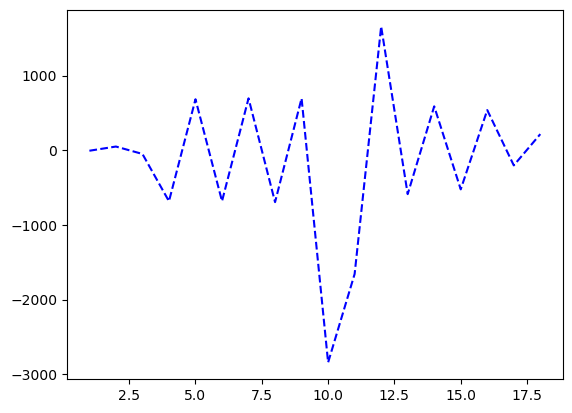

win: 11
los: 7
-6.569999999999999
49.61948249619482
-49.60239805175037
-682.8824141519248
682.9472166519247
-682.018998874147
695.0606388741469
-694.8162377630358
694.9100047074802
-2842.1529738328786
-1656.5894756799516
1657.527876791063
-587.7017764258591
588.0716975369702
-523.8398639369702
537.8963375369702
-202.64684308872464
216.17834871372463


In [158]:
with open('C:/Users/delta2794900/sorted,test2.csv') as f:
    reader = csv.reader(f)
    bal  = 100
    sood = []
    so   = []# لیست رنج عدد های ایجاد از طول لیست sood برای ایجاد چارت
    bag1 = []
    sodmk = [] #سود مرکب نهایی
    win= 0
    los = 0
    ratea = 0           #متغیر یکبار مصرف برای ذخیره سازی و محاسبه سود مرکب 
    shomarsh = 0
    for i in reader:
        sod = i[-2]
        com = i[-4]
        sod = float(sod)
        com = float(com)
        sod = sod + com 

        #bal = sod + bal    اشتباه خرکی نننت
        if sod > 0 :
            #sod = sod +1
            #sood.append(sod)
            win = win+1
            sod = sod/100
            ratea += (sod * sod) +  (0.1 * ratea)
            sodmk.append(ratea * 1000)
            if shomarsh == 0 :
                sood.append(ratea*1000)
                #print(ratea*1000)
            if shomarsh != 0 :
                if not sood:
                    sood.append(ratea * 1000) 
                    
                else:
                    sana = shomarsh - 1   # متغییر های الکی برای کار راه اندازی 
                    sona = sood[sana]
                    sona = sona / 1000
                    sood.append((ratea - sona)*1000) 
            
            shomarsh = shomarsh + 1
            ratea = 0
            
        
        if sod < 0 :
            shomarsh = shomarsh + 1
            if los == 0 :
                sood.append(sod)
                los = los+1
                sodmk.append(sod)
            else:
                #if 
                sod = (sod / sodmk[-1]) * 100
                sood.append(sod)
                los = los + 1
            
                
                
                 


b= 0
for i in sood:
    b = b+1
    so.append(b)
        
        
plt.plot(so,sood,'b--')
    #print(sood) 
    #print(bag1)
plt.show()
    
print('win:',win)
print('los:',los)
for i in sood:
    print(i)

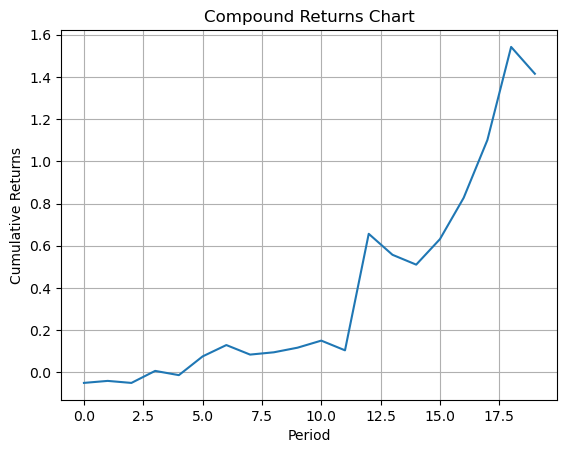

In [175]:
import numpy as np
import matplotlib.pyplot as plt

data = [-5, 1, -1, 6, -2, 9, 5, -4, 1, 2, 3, -4,50, -6, -3, 8, 12, 15, 21, -5]

# محاسبه سود وضرر برای هر دوره (به عنوان درصد)
returns = np.array(data) / 100
cumulative_returns = np.cumprod(1 + returns) - 1

# رسم چارت سود وضرر مرکب
fig, ax = plt.subplots()
ax.plot(cumulative_returns)
ax.set(xlabel='Period', ylabel='Cumulative Returns', title='Compound Returns Chart')
ax.grid()
plt.show()




In [129]:
def compound_interest(principal, rate, time):
    amount = principal * (1 + rate) ** time
    return amount

lk = []
kl = []

terr = []
sho = 0

principal = 1000
rate = 0.1
time = 5
ratea = 0
for year in range(1, time+1):
    amount = compound_interest(principal, rate, year)
    #print(ratea)
    
    ratea += (rate * rate) +  (0.1 * ratea)

    terr.append(ratea)
    
    
    if sho == 0:
        lk.append(ratea*1000)
        print( year, "is:",amount,'  ', ratea * 1000 ,  ratea, sum(lk))
        
    if sho != 0 :
        soso = sho -1
        sasa = terr[soso]
        kl.append((ratea - sasa)* 1000)
        print( year, "is:",amount,'  ', ratea * 1000 , (ratea -sasa)  *1000 , sum(kl))
        
        
    sho = sho+1


    
    


1 is: 1100.0    10.000000000000002 0.010000000000000002 10.000000000000002
2 is: 1210.0000000000002    21.000000000000004 11.000000000000004 11.000000000000004
3 is: 1331.0000000000005    33.1 12.1 23.1
4 is: 1464.1000000000004    46.410000000000004 13.310000000000002 36.410000000000004
5 is: 1610.5100000000004    61.05100000000001 14.641000000000002 51.051


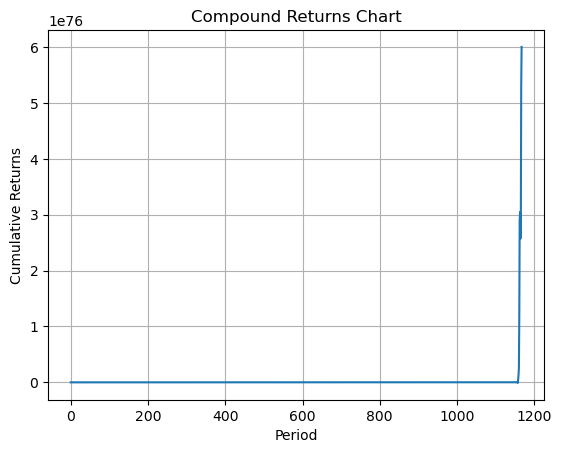

In [185]:
data = []
z = []

with open('C:/Users/delta2794900/sorted,test2.csv') as f:
    reader = csv.reader(f)

    for i in reader:
        sod = i[-2]
        com = i[-4]
        sod = float(sod)
        com = float(com)
        sod = sod + com 
        if sod != 0:
            data.append(sod)
        else:
            z.append(sod)
        
        
returns = np.array(data) / 100
cumulative_returns = np.cumprod(1 + returns) - 1

# رسم چارت سود وضرر مرکب
fig, ax = plt.subplots()
ax.plot(cumulative_returns)
ax.set(xlabel='Period', ylabel='Cumulative Returns', title='Compound Returns Chart')
ax.grid()
plt.show()